<h1 align="center">
</h1>
<h5 align="center">Sharif University of Technology<br/>Electrical Engineering Department<br/>Spring 2022</h5>

---


# Project

StudentName = Milad Samimifar  
StudentID   = 400205577



In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/MyDrive/Colab Notebooks/SL/Project'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/SL/Project


In [ ]:
!sudo apt install tree
!tree -d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (122 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: 

# Phase_1

## a. 
Done

## b.

### Import libs

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from os import listdir
from os.path import join
from scipy.io import wavfile

from IPython.display import Audio

from librosa.feature import melspectrogram
from librosa import power_to_db
from librosa.effects import trim

### Create labels

In [ ]:
# train labels
X_train = []
y_train = []

ds_train = 'Dataset/train/'

for i in range(10):
    ds_files = listdir(ds_train+str(i))
    for file in ds_files:
        label = i
        fs, data = wavfile.read(join(ds_train+str(i), file))
        X_train.append(data.astype(np.float16))
        y_train.append(label)

In [ ]:
# test labels
X_test = []
y_test = []

ds_test = 'Dataset/test/'

for i in range(10):
    ds_files = listdir(ds_test+str(i))
    for file in ds_files:
        label = i
        fs, data = wavfile.read(join(ds_test+str(i), file))
        X_test.append(data.astype(np.float16))
        y_test.append(label)

In [ ]:
print('X_train length =', len(X_train))
print('y_train length =', len(y_train))
print('X_test  length =', len(X_test))
print('y_test  length =', len(y_test))

X_train length = 2000
y_train length = 2000
X_test  length = 500
y_test  length = 500


## C.

### Bandpass filter

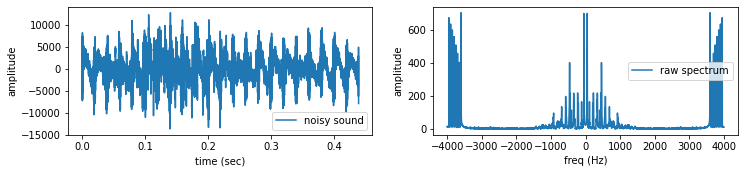

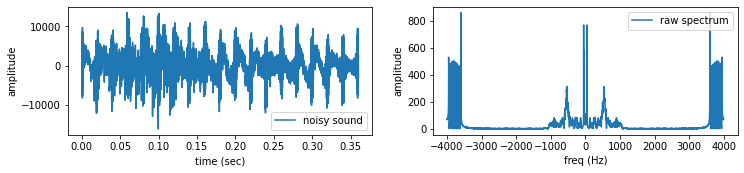

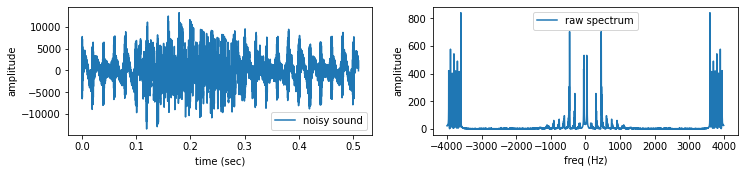

In [ ]:
# plot some of train signal and spectrum
%matplotlib inline
i1_list = np.random.randint(0,len(X_train),3)
for i in i1_list:
    n = len(X_train[i])
    T = n/fs
    t = np.arange(0,T,1/fs)  

    signal = X_train[i]
    f = np.fft.fftshift(np.fft.fft(signal))
    freq = np.fft.fftshift(np.fft.fftfreq(n,1/fs))

    plt.figure(figsize=(12,8))

    plt.subplot(321)
    plt.plot(t, signal, label='noisy sound') 
    plt.xlabel('time (sec)')
    plt.ylabel('amplitude')
    plt.legend()

    plt.subplot(322)
    plt.plot(freq, np.abs(f)/n, label='raw spectrum')
    plt.xlabel('freq (Hz)')
    plt.ylabel('amplitude');
    plt.legend()

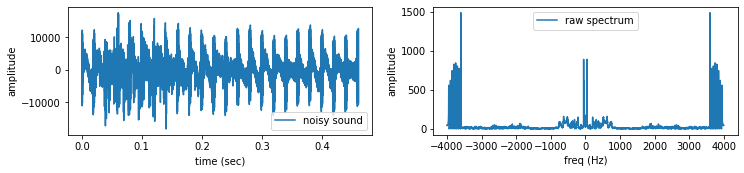

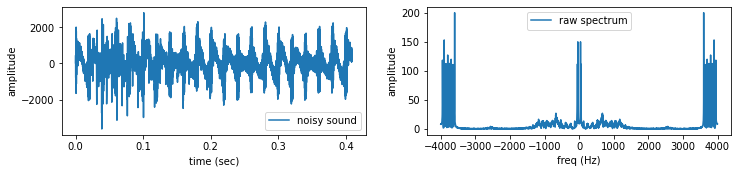

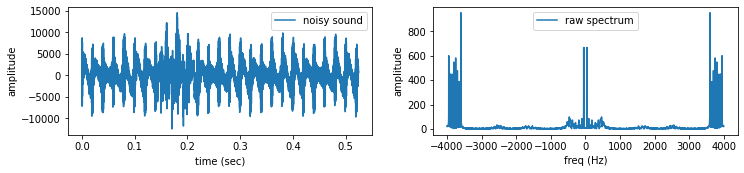

In [ ]:
# plot some of test signal and spectrum
%matplotlib inline
i2_list = np.random.randint(0,len(X_test),3) 
for i in i2_list:
    n = len(X_test[i])
    T = n/fs
    t = np.arange(0,T,1/fs)  

    signal = X_test[i]
    f = np.fft.fftshift(np.fft.fft(signal))
    freq = np.fft.fftshift(np.fft.fftfreq(n,1/fs))

    plt.figure(figsize=(12,8))

    plt.subplot(321)
    plt.plot(t, signal, label='noisy sound') 
    plt.xlabel('time (sec)')
    plt.ylabel('amplitude')
    plt.legend()

    plt.subplot(322)
    plt.plot(freq, np.abs(f)/n, label='raw spectrum')
    plt.xlabel('freq (Hz)')
    plt.ylabel('amplitude');
    plt.legend()

We need a bandpass filter in range 50 Hz and 3000 Hz

In [ ]:
# Create a bandpass filter
from scipy.signal import butter, lfilter, freqz

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

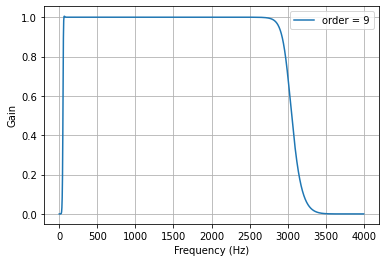

In [ ]:
# Desired cutoff frequencies (in Hz).
lowcut = 50.0
highcut = 3000.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [9]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, fs=fs, worN=2000)
    plt.plot(w, abs(h), label="order = %d" % order)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

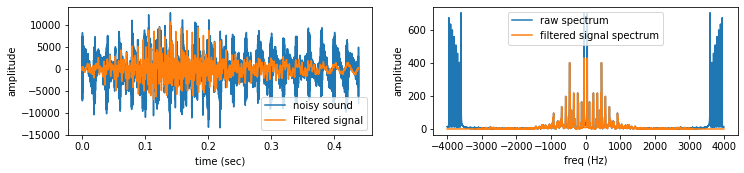

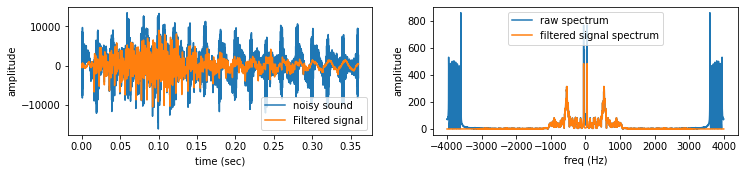

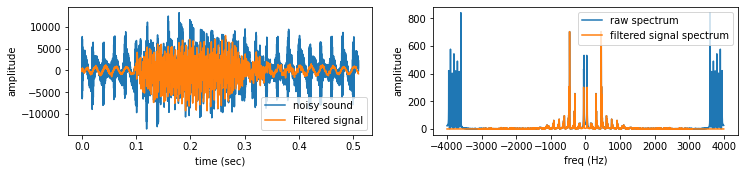

In [ ]:
# An example of filter noisy signals with above filter
for i in i1_list:
    n = len(X_train[i])
    T = n/fs
    t=np.arange(0,T,1/fs)  
    x = X_train[i]

    filtered_x = butter_bandpass_filter(x, lowcut, highcut, fs, order=9)

    f = np.fft.fftshift(np.fft.fft(x))
    f_filtered = np.fft.fftshift(np.fft.fft(filtered_x))
    freq = np.fft.fftshift(np.fft.fftfreq(n,1/fs))

    plt.figure(figsize=(12,8))

    plt.subplot(321)
    plt.plot(t, x, label='noisy sound') 
    plt.plot(t, filtered_x, label='Filtered signal') 
    plt.xlabel('time (sec)')
    plt.ylabel('amplitude')
    plt.legend()

    plt.subplot(322)
    plt.plot(freq, np.abs(f)/n, label='raw spectrum')
    plt.plot(freq, np.abs(f_filtered)/n, label='filtered signal spectrum')
    plt.xlabel('freq (Hz)')
    plt.ylabel('amplitude');
    plt.legend()

In [ ]:
# play noisy sound
Audio(x, rate=fs)


In [ ]:
# play filtered sound
Audio(filtered_x, rate=fs)

It Works!

In [ ]:
# Apply filter to all dataset
for i in range(len(X_train)):
    X_train[i] = butter_bandpass_filter(X_train[i], lowcut, highcut, fs, order=9)


for i in range(len(X_test)):
    X_test[i] = butter_bandpass_filter(X_test[i], lowcut, highcut, fs, order=9)

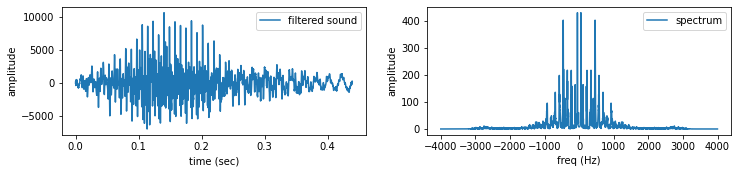

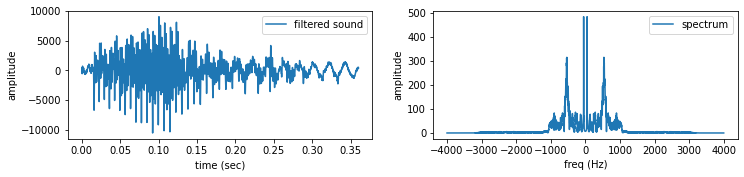

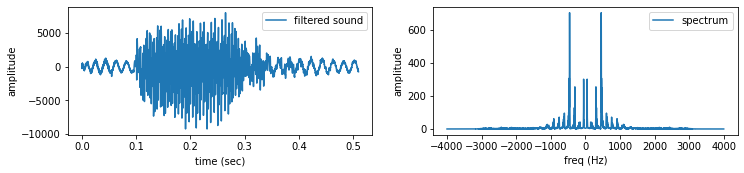

In [ ]:
# plot some of filtered train signal and spectrum
%matplotlib inline
for i in i1_list:
    n = len(X_train[i])
    T = n/fs
    t = np.arange(0,T,1/fs)  

    signal = X_train[i]
    f = np.fft.fftshift(np.fft.fft(signal))
    freq = np.fft.fftshift(np.fft.fftfreq(n,1/fs))

    plt.figure(figsize=(12,8))

    plt.subplot(321)
    plt.plot(t, signal, label='filtered sound') 
    plt.xlabel('time (sec)')
    plt.ylabel('amplitude')
    plt.legend()

    plt.subplot(322)
    plt.plot(freq, np.abs(f)/n, label='spectrum')
    plt.xlabel('freq (Hz)')
    plt.ylabel('amplitude');
    plt.legend()

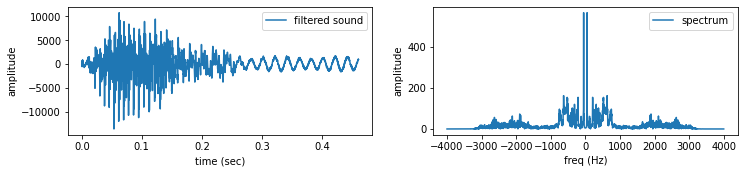

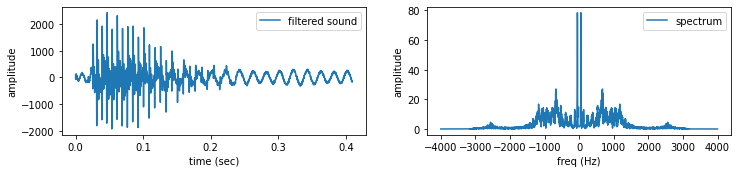

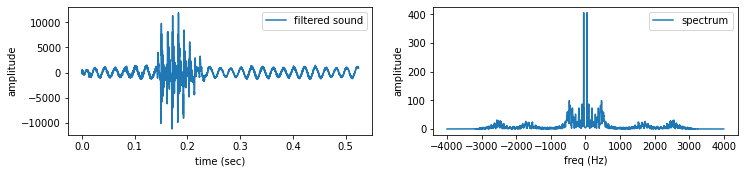

In [ ]:
# plot some of test signal and spectrum
%matplotlib inline
for i in i2_list:
    n = len(X_test[i])
    T = n/fs
    t = np.arange(0,T,1/fs)  

    signal = X_test[i]
    f = np.fft.fftshift(np.fft.fft(signal))
    freq = np.fft.fftshift(np.fft.fftfreq(n,1/fs))

    plt.figure(figsize=(12,8))

    plt.subplot(321)
    plt.plot(t, signal, label='filtered sound') 
    plt.xlabel('time (sec)')
    plt.ylabel('amplitude')
    plt.legend()

    plt.subplot(322)
    plt.plot(freq, np.abs(f)/n, label='spectrum')
    plt.xlabel('freq (Hz)')
    plt.ylabel('amplitude');
    plt.legend()

### Remove white noise

We could remove white noise with noisereduce lib in python.

In [ ]:
!pip install noisereduce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import noisereduce as nr

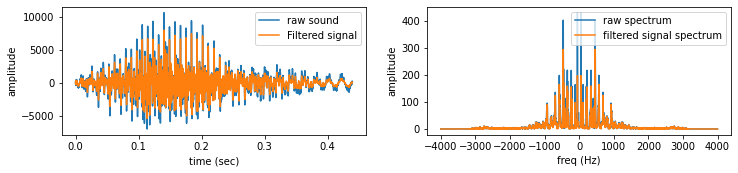

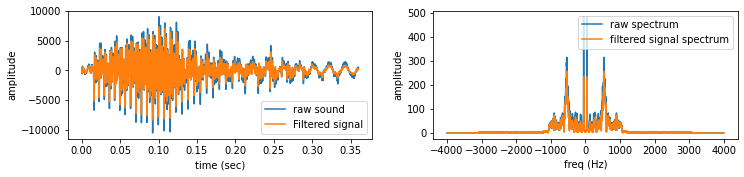

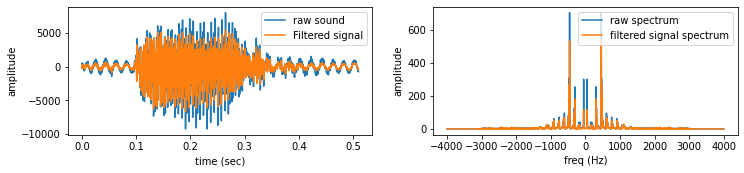

In [ ]:
# An example of noise reduction with nr lib
for i in i1_list:
    n = len(X_train[i])
    T = n/fs
    t=np.arange(0,T,1/fs)  
    x = X_train[i]

    filtered_x = nr.reduce_noise(y=x, sr=fs)

    f = np.fft.fftshift(np.fft.fft(x))
    f_filtered = np.fft.fftshift(np.fft.fft(filtered_x))
    freq = np.fft.fftshift(np.fft.fftfreq(n,1/fs))

    plt.figure(figsize=(12,8))

    plt.subplot(321)
    plt.plot(t, x, label='raw sound') 
    plt.plot(t, filtered_x, label='Filtered signal') 
    plt.xlabel('time (sec)')
    plt.ylabel('amplitude')
    plt.legend()

    plt.subplot(322)
    plt.plot(freq, np.abs(f)/n, label='raw spectrum')
    plt.plot(freq, np.abs(f_filtered)/n, label='filtered signal spectrum')
    plt.xlabel('freq (Hz)')
    plt.ylabel('amplitude');
    plt.legend()

In [ ]:
# play noisy sound
Audio(x, rate=fs)

In [ ]:
# play filtered sound
Audio(filtered_x, rate=fs)

In [ ]:
# perform noise reduction for all dataset
for i in range(len(X_train)):
    X_train[i] = nr.reduce_noise(y=X_train[i], sr=fs)


for i in range(len(X_test)):
    X_test[i] = nr.reduce_noise(y=X_test[i], sr=fs)

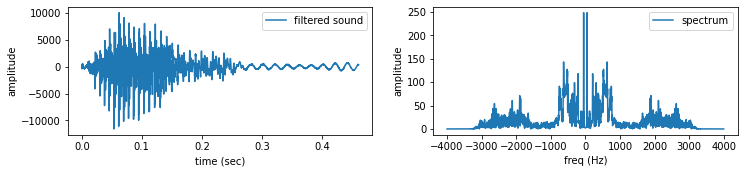

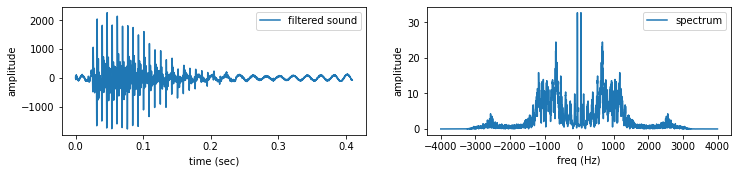

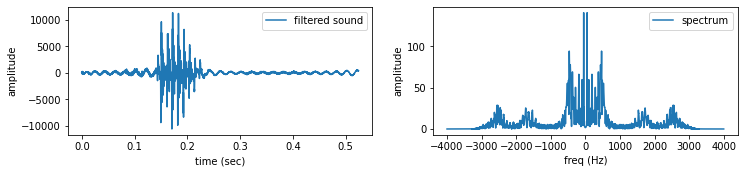

In [ ]:
# plot some of test signal and spectrum
%matplotlib inline
for i in i2_list:
    n = len(X_test[i])
    T = n/fs
    t = np.arange(0,T,1/fs)  

    signal = X_test[i]
    f = np.fft.fftshift(np.fft.fft(signal))
    freq = np.fft.fftshift(np.fft.fftfreq(n,1/fs))

    plt.figure(figsize=(12,8))

    plt.subplot(321)
    plt.plot(t, signal, label='filtered sound') 
    plt.xlabel('time (sec)')
    plt.ylabel('amplitude')
    plt.legend()

    plt.subplot(322)
    plt.plot(freq, np.abs(f)/n, label='spectrum')
    plt.xlabel('freq (Hz)')
    plt.ylabel('amplitude');
    plt.legend()

## D.

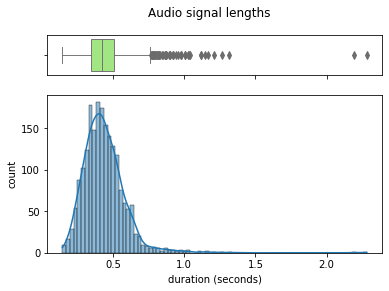

In [ ]:
def show_length_distribution(signals, rate = 8000):
    sampel_times = [len(x)/rate for x in signals]


    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.20, .80)})

    sns.boxplot(x = sampel_times, ax=ax_box, linewidth = 0.9, color=  '#9af772')
    sns.histplot(x = sampel_times, ax=ax_hist, bins = 'fd', kde = True)

    ax_box.set(xlabel='')


    title = 'Audio signal lengths'
    x_label = 'duration (seconds)'
    y_label = 'count'

    plt.suptitle(title)
    ax_hist.set_xlabel(x_label)
    ax_hist.set_ylabel(y_label)
    plt.show()
    return sampel_times


lengths = show_length_distribution(X_train)

In [ ]:
def find_max_list(list):
    list_len = [len(i) for i in list]
    print('max_length =', max(list_len), ', index = ', np.argmax(list_len))
    return max(list_len), np.argmax(list_len)

ma, argma = find_max_list(X_train)
len(X_train[argma])
Audio(X_train[argma], rate=fs)

max_length = 18262 , index =  1926


### Remove silence

In [ ]:
# anything below 10 db is considered as silence
# remove silence periods of audio signals
def remove_silence(sample, sr= 8000, top_db = 10):
    y = np.array(sample, dtype = np.float64)
    yt, _ = trim(y, top_db= top_db)
    return yt

In [ ]:
X_train = [remove_silence(x) for x in X_train]
X_test = [remove_silence(x) for x in X_test]

In [ ]:
ma, argma = find_max_list(X_train)
len(X_train[argma])
Audio(X_train[argma], rate=fs)

max_length = 5324 , index =  562


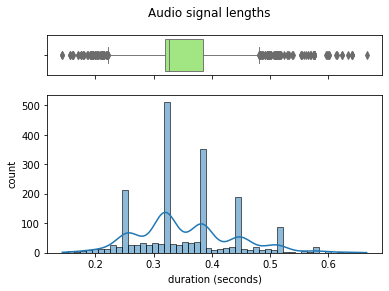

In [ ]:
show_length_distribution(X_train);

### Allign all recordings (pad to max length recording)

In [ ]:
longest_length_train, _ = find_max_list(X_train)
longest_length_test, _ = find_max_list(X_test)

N = longest_length_train

max_length = 5324 , index =  562
max_length = 5167 , index =  127


In [ ]:
# train data
X_uniform = []
for x in X_train:
    if len(x) < N:
        X_uniform.append(np.pad(x, (0, N - len(x)), constant_values = (0, 0)))
    else:
        X_uniform.append(x[:N])
X_train = X_uniform

# test data
X_uniform = []
for x in X_test:
    if len(x) < N:
        X_uniform.append(np.pad(x, (0, N - len(x)), constant_values = (0, 0)))
    else:
        X_uniform.append(x[:N])
X_test = X_uniform

# Phase_2a

## a and b.

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

import pickle

In [ ]:
# normalize data
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# shuffle data
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [ ]:
models_list = [RFC(), RFC(n_estimators= 200, criterion= 'gini', min_impurity_decrease= 0.0,random_state = fs, n_jobs = -1 ),
               svm.SVC(kernel = 'linear', C = 1.0), svm.SVC(kernel = 'linear', C = 10.0), svm.SVC(kernel = 'rbf', C = 1.0), 
               svm.SVC(kernel = 'rbf', C = 10.0),]
for model in models_list:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n", model)
    clf = model
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'accuracy', n_jobs = -1)
    print(f"Average accuracy of model: {np.mean(scores):.2f}")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier()
Average accuracy of model: 0.34
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=8000)
Average accuracy of model: 0.37
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(kernel='linear')
Average accuracy of model: 0.19
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0, kernel='linear')
Average accuracy of model: 0.21
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC()
Average accuracy of model: 0.14
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0)
Average accuracy of model: 0.20


Best model on validation data: RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=8000)

In [ ]:
clf = RFC(n_estimators=200, n_jobs=-1, random_state=8000)
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train, test_size = 0.20, random_state = fs)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_train1)
acc = accuracy_score(y_train1, y_pred)
p,r,f,s = precision_recall_fscore_support(y_train1, y_pred)
print('Accuracy on train data:' ,acc)

y_pred = clf.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
p,r,f,s = precision_recall_fscore_support(y_valid, y_pred)
print('Accuracy on validation data:' ,acc)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
print('Accuracy on test data:' ,acc)

Accuracy on train data: 1.0
Accuracy on validation data: 0.365
Accuracy on test data: 0.382


In [ ]:
print('confusion_matrix = \n',confusion_matrix(y_pred, y_test))

confusion_matrix = 
 [[33  6  3  7  6  2  0  6  0  8]
 [ 2  6  0  3  1  2  0  2  4  1]
 [ 1  6 21  8  2  2  2  4  2  1]
 [ 1  3  3  9  4  1  3  1  2  3]
 [ 0  3  2  2 13  7  2  8  0  1]
 [ 1  4  1  2  3 12  0  1  2  1]
 [ 0  1  6  4  4  0 31  6  6  0]
 [ 3  2  4  5  4  3  3 10  3  5]
 [ 0 11  5  5 10  7  9  4 29  3]
 [ 9  8  5  5  3 14  0  8  2 27]]


In [ ]:
# save model
model_path = './Phase_2a/Model_Phase1a.pkl'
scaler_path = './Phase_2a/scaler.pkl'
pickle.dump(clf, open(model_path, 'wb'))
# save scaler
pickle.dump(scaler, open(scaler_path, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(model_path, 'rb'))
result = loaded_model.score(X_test, y_test)
print('Accuracy on test data:', result)

Accuracy on test data: 0.382


## c.



In [ ]:
from IPython.display import clear_output 

! pip install noisereduce
clear_output()

In [ ]:
# import libs
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from os import listdir
from os.path import join
from scipy.io import wavfile

from IPython.display import Audio

import librosa
from librosa.feature import melspectrogram
from librosa import power_to_db
from librosa.effects import trim

from scipy.signal import butter, lfilter, freqz
import noisereduce as nr

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

import pickle

# functions
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def remove_silence(sample, sr= 8000, top_db = 10):
    y = np.array(sample, dtype = np.float64)
    yt, _ = trim(y, top_db= top_db)
    return yt

In [ ]:
def Predict_Phase1(model_path, test_path):
    scaler_path = './Phase_2a/scaler.pkl'
    # load test dataset
    X_test = []
    y_test = []
    for i in range(10):
        ds_files = listdir(test_path+str(i))
        for file in ds_files:
            label = i
            fs, data = wavfile.read(join(test_path+str(i), file))
            X_test.append(data.astype(np.float16))
            y_test.append(label)

    # preprocessing
    # apply bandpass filter
    lowcut = 50.0
    highcut = 3000.0
    X_test = [butter_bandpass_filter(x, lowcut, highcut, fs, order=9) for x in X_test]

    # perform noise reduction
    X_test = [nr.reduce_noise(y=x, sr=fs) for x in X_test]

    # remove silence
    X_test = [remove_silence(x) for x in X_test]

    # align all recordings
    N = 5324
    X_uniform = []
    for x in X_test:
        if len(x) < N:
            X_uniform.append(np.pad(x, (0, N - len(x)), constant_values = (0, 0)))
        else:
            X_uniform.append(x[:N])
    X_test = X_uniform

    # load the model
    clf = pickle.load(open(model_path, 'rb'))
    # load the scaler
    scaler = pickle.load(open(scaler_path, 'rb'))
    # transform the test dataset
    X_test = scaler.transform(X_test)
    # evaluate accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
    print('Accuracy on test data:' ,acc)
    # save .npy file
    np.save('./Phase_2a/phase1a_predicted.npy', y_pred)

In [ ]:
test_path = './Dataset/test/'
model_path = './Phase_2a/Model_Phase1a.pkl'

Predict_Phase1(model_path, test_path)

Accuracy on test data: 0.382


In [ ]:
!ls ./Phase_2a

Model_Phase1a.pkl  phase1a_predicted.npy  scaler.pkl


# Phase_2b

## a.
in report

## b.

In [3]:
# import libs
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from os import listdir
from os.path import join
from scipy.io import wavfile

from IPython.display import Audio

import librosa
import librosa.display
from librosa.feature import melspectrogram
from librosa import power_to_db
from librosa.effects import trim

from scipy.signal import butter, lfilter, freqz
import noisereduce as nr

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

import pickle

# functions
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def remove_silence(sample, sr= 8000, top_db = 10):
    y = np.array(sample, dtype = np.float64)
    yt, _ = trim(y, top_db= top_db)
    return yt

In [4]:
# apply all preprocess to dataset and return X, y
def prepare_dataset(path):
    # load test dataset
    X = []
    y = []
    for i in range(10):
        ds_files = listdir(path+str(i))
        for file in ds_files:
            label = i
            fs, data = wavfile.read(join(path+str(i), file))
            X.append(data.astype(np.float16))
            y.append(label)

    # preprocessing
    # apply bandpass filter
    lowcut = 50.0
    highcut = 3000.0
    X = [butter_bandpass_filter(x, lowcut, highcut, fs, order=9) for x in X]

    # perform noise reduction
    X = [nr.reduce_noise(y=x, sr=fs) for x in X]

    # remove silence
    X = [remove_silence(x) for x in X]

    # align all recordings
    N = 5324
    X_uniform = []
    for x in X:
        if len(x) < N:
            X_uniform.append(np.pad(x, (0, N - len(x)), constant_values = (0, 0)))
        else:
            X_uniform.append(x[:N])
    X = X_uniform

    X = np.array(X)
    return X, y

In [ ]:
train_path = 'Dataset/train/'
test_path = 'Dataset/test/'

X_train, y_train = prepare_dataset(train_path) 
X_test, y_test = prepare_dataset(test_path) 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
i = 200
shape of spectrogram =  (64, 64)


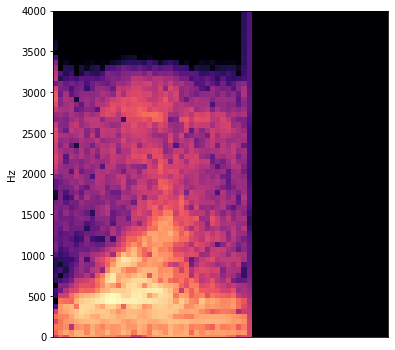

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
i = 846
shape of spectrogram =  (64, 64)


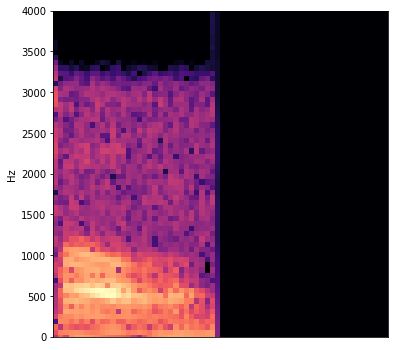

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
i = 986
shape of spectrogram =  (64, 64)


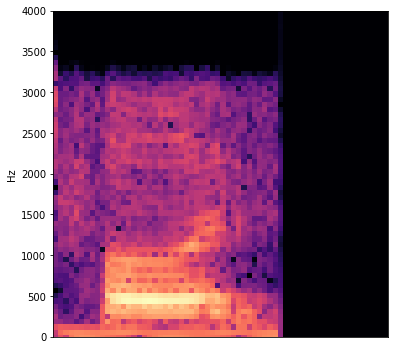

In [ ]:
for i in i1_list:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\ni =', i)
    X = librosa.stft(X_train[i], n_fft=127, hop_length=84)
    Xdb = librosa.amplitude_to_db(abs(X))
    print('shape of spectrogram = ', Xdb.shape)
    plt.figure(figsize=(6, 6))
    librosa.display.specshow(Xdb, sr=fs, y_axis='hz') 
    plt.show()

In [ ]:
X_train_spec2d = []
for i in range(len(X_train)):
    # stft feature extraction
    X = librosa.stft(X_train[i], n_fft=127, hop_length=84)
    Xdb = librosa.amplitude_to_db(abs(X))
    X_train_spec2d.append(Xdb)

X_train_spec2d = np.array(X_train_spec2d)

X_test_spec2d = []
for i in range(len(X_test)):
    # stft feature extraction
    X = librosa.stft(X_test[i], n_fft=127, hop_length=84)
    Xdb = librosa.amplitude_to_db(abs(X))
    X_test_spec2d.append(Xdb)

X_test_spec2d = np.array(X_test_spec2d)

print('X train spec 2d shape = ', X_train_spec2d.shape)
print('X test spec 2d shape = ', X_test_spec2d.shape)

X train spec 2d shape =  (2000, 64, 64)
X test spec 2d shape =  (500, 64, 64)


## c.

In [ ]:
X_train_spec1d = []
for i in range(len(X_train)):
    # stft feature extraction
    X = librosa.stft(X_train[i], n_fft=127, hop_length=84)
    Xdb = librosa.amplitude_to_db(abs(X))
    # flatten
    X_train_spec1d.append(Xdb.ravel())

X_train = np.array(X_train_spec1d)

X_test_spec1d = []
for i in range(len(X_test)):
    # stft feature extraction
    X = librosa.stft(X_test[i], n_fft=127, hop_length=84)
    Xdb = librosa.amplitude_to_db(abs(X))
    # flatten
    X_test_spec1d.append(Xdb.ravel())

X_test = np.array(X_test_spec1d)

print('X train spec 1d shape = ', X_train.shape)
print('X test spec 1d shape = ', X_test.shape)

X train spec 1d shape =  (2000, 4096)
X test spec 1d shape =  (500, 4096)


## d.

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

import pickle

In [ ]:
# normalize data
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# shuffle data
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [ ]:
models_list = [RFC(), RFC(n_estimators= 200, criterion= 'gini', min_impurity_decrease= 0.0,random_state = fs, n_jobs = -1 ),
               svm.SVC(kernel = 'linear', C = 1.0), svm.SVC(kernel = 'linear', C = 10.0), svm.SVC(kernel = 'rbf', C = 1.0), 
               svm.SVC(kernel = 'rbf', C = 10.0),]
for model in models_list:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n", model)
    clf = model
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'accuracy', n_jobs = -1)
    print(f"Average accuracy of model: {np.mean(scores):.2f}")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier()
Average accuracy of model: 0.91
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=8000)
Average accuracy of model: 0.91
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(kernel='linear')
Average accuracy of model: 0.95
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0, kernel='linear')
Average accuracy of model: 0.95
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC()
Average accuracy of model: 0.91
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0)
Average accuracy of model: 0.96


Best model on validation data: svm.SVC(kernel = 'rbf', C = 10.0)

In [ ]:
clf = svm.SVC(kernel = 'rbf', C = 10.0)
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train, test_size = 0.20, random_state = fs)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_train1)
acc = accuracy_score(y_train1, y_pred)
p,r,f,s = precision_recall_fscore_support(y_train1, y_pred)
print('Accuracy on train data:' ,acc)

y_pred = clf.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
p,r,f,s = precision_recall_fscore_support(y_valid, y_pred)
print('Accuracy on validation data:' ,acc)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
print('Accuracy on test data:' ,acc)

Accuracy on train data: 0.999375
Accuracy on validation data: 0.9375
Accuracy on test data: 0.952


In [ ]:
print('confusion_matrix = \n',confusion_matrix(y_pred, y_test))

confusion_matrix = 
 [[50  0  0  0  0  0  0  0  0  0]
 [ 0 46  0  1  2  0  0  0  0  1]
 [ 0  0 48  1  1  0  0  1  0  0]
 [ 0  0  1 44  0  0  2  0  0  0]
 [ 0  2  0  0 47  0  0  0  0  0]
 [ 0  1  0  0  0 49  0  0  0  2]
 [ 0  0  0  1  0  0 47  0  0  0]
 [ 0  0  1  2  0  0  1 49  0  1]
 [ 0  0  0  1  0  0  0  0 50  0]
 [ 0  1  0  0  0  1  0  0  0 46]]


In [ ]:
# save model
model_path = './Phase_2b/Model_Phase1b.pkl'
scaler_path = './Phase_2b/scaler.pkl'
pickle.dump(clf, open(model_path, 'wb'))
# save scaler
pickle.dump(scaler, open(scaler_path, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(model_path, 'rb'))
result = loaded_model.score(X_test, y_test)
print('Accuracy on test data:', result)

Accuracy on test data: 0.952


## e.

In [ ]:
from IPython.display import clear_output 

! pip install noisereduce
clear_output()

In [ ]:
# import libs
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from os import listdir
from os.path import join
from scipy.io import wavfile

from IPython.display import Audio

import librosa
from librosa.feature import melspectrogram
from librosa import power_to_db
from librosa.effects import trim

from scipy.signal import butter, lfilter, freqz
import noisereduce as nr

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

import pickle

# functions
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def remove_silence(sample, sr= 8000, top_db = 10):
    y = np.array(sample, dtype = np.float64)
    yt, _ = trim(y, top_db= top_db)
    return yt

In [ ]:
def Predict_Phase2(model_path, test_path):
    scaler_path = './Phase_2b/scaler.pkl'
    # load test dataset
    X_test = []
    y_test = []
    for i in range(10):
        ds_files = listdir(test_path+str(i))
        for file in ds_files:
            label = i
            fs, data = wavfile.read(join(test_path+str(i), file))
            X_test.append(data.astype(np.float16))
            y_test.append(label)

    # preprocessing
    # apply bandpass filter
    lowcut = 50.0
    highcut = 3000.0
    X_test = [butter_bandpass_filter(x, lowcut, highcut, fs, order=9) for x in X_test]

    # perform noise reduction
    X_test = [nr.reduce_noise(y=x, sr=fs) for x in X_test]

    # remove silence
    X_test = [remove_silence(x) for x in X_test]

    # align all recordings
    N = 5324
    X_uniform = []
    for x in X_test:
        if len(x) < N:
            X_uniform.append(np.pad(x, (0, N - len(x)), constant_values = (0, 0)))
        else:
            X_uniform.append(x[:N])
    X_test = X_uniform

    # extract feature: stft
    X_testt = []
    for i in range(len(X_test)):
        # stft feature extraction
        X = librosa.stft(X_test[i], n_fft=127, hop_length=84)
        Xdb = librosa.amplitude_to_db(abs(X))
        # flatten
        X_testt.append(Xdb.ravel())
    X_test = np.array(X_testt)

    # load the model
    clf = pickle.load(open(model_path, 'rb'))
    # load the scaler
    scaler = pickle.load(open(scaler_path, 'rb'))
    # transform the test dataset
    X_test = scaler.transform(X_test)
    # evaluate accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
    print('Accuracy on test data:' ,acc)
    # save .npy file
    np.save('./Phase_2b/phase1b_predicted.npy', y_pred)

In [ ]:
test_path = './Dataset/test/'
model_path = './Phase_2b/Model_Phase1b.pkl'

Predict_Phase2(model_path, test_path)

Accuracy on test data: 0.952


In [5]:
!ls ./Phase_2b

extra  Model_Phase1b.pkl  phase1b_predicted.npy  scaler.pkl


## f.
in report

## g. extra

### 1.Mel spectogram

In [6]:
train_path = 'Dataset/train/'
test_path = 'Dataset/test/'

X_train, y_train = prepare_dataset(train_path) 
X_test, y_test = prepare_dataset(test_path) 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
i = 200
shape of feature =  (128, 11)


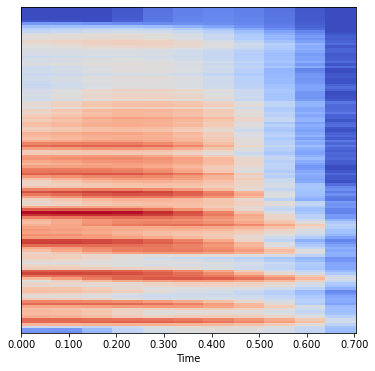

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
i = 846
shape of feature =  (128, 11)


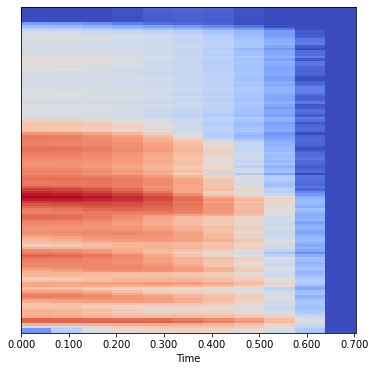

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
i = 986
shape of feature =  (128, 11)


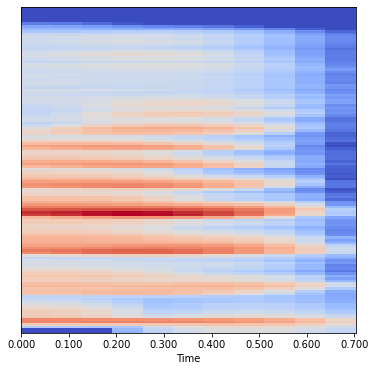

In [12]:
for i in i1_list:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\ni =', i)
    feature = power_to_db(melspectrogram(X_train[i], n_fft= len(X_train[i])), np.mean)
    print('shape of feature = ', feature.shape)
    #Displaying  the feature:
    plt.figure(figsize=(6, 6))
    librosa.display.specshow(feature, sr=fs, x_axis='time')
    plt.show()

In [13]:
X_train_spec1d = []
for i in range(len(X_train)):
    # mfcc feature extraction
    feature = power_to_db(melspectrogram(X_train[i], n_fft= len(X_train[i])), np.mean)
    # flatten
    X_train_spec1d.append(feature.ravel())

X_train = np.array(X_train_spec1d)

X_test_spec1d = []
for i in range(len(X_test)):
    # mfcc feature extraction
    feature = power_to_db(melspectrogram(X_test[i], n_fft= len(X_test[i])), np.mean)
    # flatten
    X_test_spec1d.append(feature.ravel())

X_test = np.array(X_test_spec1d)

print('X train spec 1d shape = ', X_train.shape)
print('X test spec 1d shape = ', X_test.shape)

X train spec 1d shape =  (2000, 1408)
X test spec 1d shape =  (500, 1408)


In [14]:
# normalize data
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# shuffle data
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [15]:
models_list = [RFC(), RFC(n_estimators= 200, criterion= 'gini', min_impurity_decrease= 0.0,random_state = fs, n_jobs = -1 ),
               svm.SVC(kernel = 'linear', C = 1.0), svm.SVC(kernel = 'linear', C = 10.0), svm.SVC(kernel = 'rbf', C = 1.0), 
               svm.SVC(kernel = 'rbf', C = 10.0),]
for model in models_list:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n", model)
    clf = model
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'accuracy', n_jobs = -1)
    print(f"Average accuracy of model: {np.mean(scores):.2f}")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier()
Average accuracy of model: 0.92
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=8000)
Average accuracy of model: 0.94
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(kernel='linear')
Average accuracy of model: 0.97
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0, kernel='linear')
Average accuracy of model: 0.97
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC()
Average accuracy of model: 0.97
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0)
Average accuracy of model: 0.98


Best model on validation data: svm.SVC(kernel = 'rbf', C = 10.0)

In [16]:
clf = svm.SVC(kernel = 'rbf', C = 10.0)
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train, test_size = 0.20, random_state = fs)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_train1)
acc = accuracy_score(y_train1, y_pred)
p,r,f,s = precision_recall_fscore_support(y_train1, y_pred)
print('Accuracy on train data:' ,acc)

y_pred = clf.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
p,r,f,s = precision_recall_fscore_support(y_valid, y_pred)
print('Accuracy on validation data:' ,acc)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
print('Accuracy on test data:' ,acc)

Accuracy on train data: 0.999375
Accuracy on validation data: 0.9775
Accuracy on test data: 0.978


In [17]:
print('confusion_matrix = \n',confusion_matrix(y_pred, y_test))

confusion_matrix = 
 [[48  0  0  0  0  0  0  0  0  0]
 [ 0 49  0  0  2  0  0  0  0  0]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  1 49  0  0  1  0  0  0]
 [ 1  0  0  0 48  0  0  0  0  0]
 [ 0  1  0  0  0 50  0  0  0  1]
 [ 0  0  0  1  0  0 49  1  0  0]
 [ 1  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0  1  0 49]]


In [18]:
# save model
model_path = './Phase_2b/extra/Model_Phase1b_melspec.pkl'
scaler_path = './Phase_2b/extra/scaler_melspec.pkl'
pickle.dump(clf, open(model_path, 'wb'))
# save scaler
pickle.dump(scaler, open(scaler_path, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(model_path, 'rb'))
result = loaded_model.score(X_test, y_test)
print('Accuracy on test data:', result)

Accuracy on test data: 0.978


#### define funtion for test

In [19]:
from IPython.display import clear_output 

! pip install noisereduce
clear_output()

In [20]:
# import libs
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from os import listdir
from os.path import join
from scipy.io import wavfile

from IPython.display import Audio

import librosa
from librosa.feature import melspectrogram
from librosa import power_to_db
from librosa.effects import trim

from scipy.signal import butter, lfilter, freqz
import noisereduce as nr

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

import pickle

# functions
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def remove_silence(sample, sr= 8000, top_db = 10):
    y = np.array(sample, dtype = np.float64)
    yt, _ = trim(y, top_db= top_db)
    return yt

In [21]:
def Predict_Phase2_melspec(model_path, test_path):
    scaler_path = './Phase_2b/extra/scaler_melspec.pkl'
    # load test dataset
    X_test = []
    y_test = []
    for i in range(10):
        ds_files = listdir(test_path+str(i))
        for file in ds_files:
            label = i
            fs, data = wavfile.read(join(test_path+str(i), file))
            X_test.append(data.astype(np.float16))
            y_test.append(label)

    # preprocessing
    # apply bandpass filter
    lowcut = 50.0
    highcut = 3000.0
    X_test = [butter_bandpass_filter(x, lowcut, highcut, fs, order=9) for x in X_test]

    # perform noise reduction
    X_test = [nr.reduce_noise(y=x, sr=fs) for x in X_test]

    # remove silence
    X_test = [remove_silence(x) for x in X_test]

    # align all recordings
    N = 5324
    X_uniform = []
    for x in X_test:
        if len(x) < N:
            X_uniform.append(np.pad(x, (0, N - len(x)), constant_values = (0, 0)))
        else:
            X_uniform.append(x[:N])
    X_test = X_uniform

    # extract feature: mel spec
    X_testt = []
    for i in range(len(X_test)):
        # feature extraction
        feature = power_to_db(melspectrogram(X_test[i], n_fft= len(X_test[i])), np.mean)
        # flatten
        X_testt.append(feature.ravel())
    X_test = np.array(X_testt)

    # load the model
    clf = pickle.load(open(model_path, 'rb'))
    # load the scaler
    scaler = pickle.load(open(scaler_path, 'rb'))
    # transform the test dataset
    X_test = scaler.transform(X_test)
    # evaluate accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
    print('Accuracy on test data:' ,acc)
    # save .npy file
    np.save('./Phase_2b/extra/phase1b_predicted_melspec.npy', y_pred)

In [22]:
test_path = './Dataset/test/'
model_path = './Phase_2b/extra/Model_Phase1b_melspec.pkl'

Predict_Phase2_melspec(model_path, test_path)

Accuracy on test data: 0.978


In [23]:
!ls './Phase_2b/extra'

Model_Phase1b_melspec.pkl  phase1b_predicted_melspec.npy  scaler_melspec.pkl
Model_Phase1b_mfcc.pkl	   phase1b_predicted_mfcc.npy	  scaler_mfcc.pkl


### 2.MFCC — Mel-Frequency Cepstral Coefficients

In [ ]:
train_path = 'Dataset/train/'
test_path = 'Dataset/test/'

X_train, y_train = prepare_dataset(train_path) 
X_test, y_test = prepare_dataset(test_path) 

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
i = 200
shape of mfcc =  (20, 11)


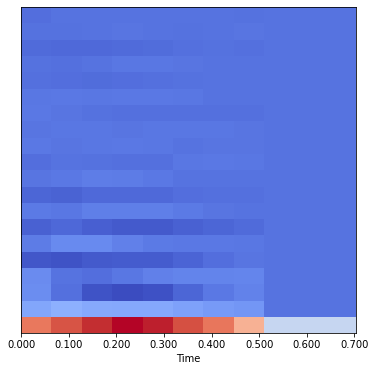

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
i = 846
shape of mfcc =  (20, 11)


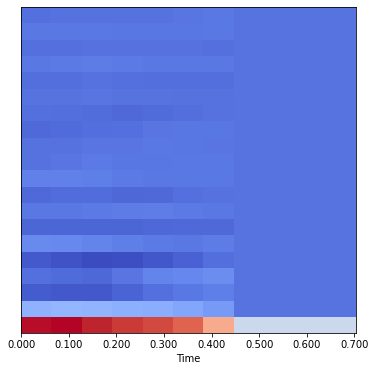

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
i = 986
shape of mfcc =  (20, 11)


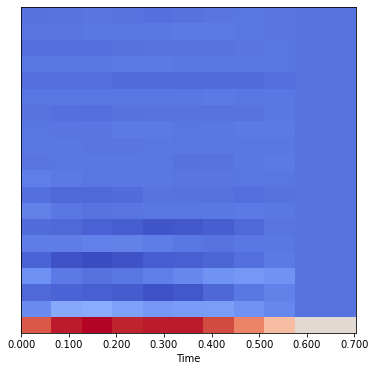

In [ ]:
for i in i1_list:
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\ni =', i)
    mfccs = librosa.feature.mfcc(X_train[i], sr=fs)
    print('shape of mfcc = ', mfccs.shape)
    #Displaying  the MFCCs:
    plt.figure(figsize=(6, 6))
    librosa.display.specshow(mfccs, sr=fs, x_axis='time')
    plt.show()

In [ ]:
X_train_spec1d = []
for i in range(len(X_train)):
    # mfcc feature extraction
    mfccs = librosa.feature.mfcc(X_train[i], sr=fs)
    # flatten
    X_train_spec1d.append(mfccs.ravel())

X_train = np.array(X_train_spec1d)

X_test_spec1d = []
for i in range(len(X_test)):
    # mfcc feature extraction
    mfccs = librosa.feature.mfcc(X_test[i], sr=fs)
    # flatten
    X_test_spec1d.append(mfccs.ravel())

X_test = np.array(X_test_spec1d)

print('X train spec 1d shape = ', X_train.shape)
print('X test spec 1d shape = ', X_test.shape)

X train spec 1d shape =  (2000, 220)
X test spec 1d shape =  (500, 220)


In [ ]:
# normalize data
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# shuffle data
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [ ]:
models_list = [RFC(), RFC(n_estimators= 200, criterion= 'gini', min_impurity_decrease= 0.0,random_state = fs, n_jobs = -1 ),
               svm.SVC(kernel = 'linear', C = 1.0), svm.SVC(kernel = 'linear', C = 10.0), svm.SVC(kernel = 'rbf', C = 1.0), 
               svm.SVC(kernel = 'rbf', C = 10.0),]
for model in models_list:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n", model)
    clf = model
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring = 'accuracy', n_jobs = -1)
    print(f"Average accuracy of model: {np.mean(scores):.2f}")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier()
Average accuracy of model: 0.97
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=8000)
Average accuracy of model: 0.97
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(kernel='linear')
Average accuracy of model: 0.98
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0, kernel='linear')
Average accuracy of model: 0.98
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC()
Average accuracy of model: 0.98
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0)
Average accuracy of model: 0.99


Best model on validation data: svm.SVC(kernel = 'rbf', C = 10.0)

In [ ]:
clf = svm.SVC(kernel = 'rbf', C = 10.0)
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train, test_size = 0.20, random_state = fs)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_train1)
acc = accuracy_score(y_train1, y_pred)
p,r,f,s = precision_recall_fscore_support(y_train1, y_pred)
print('Accuracy on train data:' ,acc)

y_pred = clf.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
p,r,f,s = precision_recall_fscore_support(y_valid, y_pred)
print('Accuracy on validation data:' ,acc)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
print('Accuracy on test data:' ,acc)

Accuracy on train data: 0.999375
Accuracy on validation data: 0.9725
Accuracy on test data: 0.99


In [ ]:
print('confusion_matrix = \n',confusion_matrix(y_pred, y_test))

confusion_matrix = 
 [[50  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 50  1  0  0  0  0  0  0]
 [ 0  0  0 48  0  0  0  1  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 50  0  0  0  1]
 [ 0  0  0  1  0  0 49  0  0  0]
 [ 0  0  0  0  0  0  1 49  0  0]
 [ 0  0  0  0  0  0  0  0 50  0]
 [ 0  0  0  0  0  0  0  0  0 49]]


In [ ]:
# save model
model_path = './Phase_2b/extra/Model_Phase1b_mfcc.pkl'
scaler_path = './Phase_2b/extra/scaler_mfcc.pkl'
pickle.dump(clf, open(model_path, 'wb'))
# save scaler
pickle.dump(scaler, open(scaler_path, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(model_path, 'rb'))
result = loaded_model.score(X_test, y_test)
print('Accuracy on test data:', result)

Accuracy on test data: 0.99


#### define funtion for test

In [ ]:
from IPython.display import clear_output 

! pip install noisereduce
clear_output()

In [ ]:
# import libs
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from os import listdir
from os.path import join
from scipy.io import wavfile

from IPython.display import Audio

import librosa
from librosa.feature import melspectrogram
from librosa import power_to_db
from librosa.effects import trim

from scipy.signal import butter, lfilter, freqz
import noisereduce as nr

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

import pickle

# functions
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def remove_silence(sample, sr= 8000, top_db = 10):
    y = np.array(sample, dtype = np.float64)
    yt, _ = trim(y, top_db= top_db)
    return yt

In [ ]:
def Predict_Phase2_mfcc(model_path, test_path):
    scaler_path = './Phase_2b/extra/scaler_mfcc.pkl'
    # load test dataset
    X_test = []
    y_test = []
    for i in range(10):
        ds_files = listdir(test_path+str(i))
        for file in ds_files:
            label = i
            fs, data = wavfile.read(join(test_path+str(i), file))
            X_test.append(data.astype(np.float16))
            y_test.append(label)

    # preprocessing
    # apply bandpass filter
    lowcut = 50.0
    highcut = 3000.0
    X_test = [butter_bandpass_filter(x, lowcut, highcut, fs, order=9) for x in X_test]

    # perform noise reduction
    X_test = [nr.reduce_noise(y=x, sr=fs) for x in X_test]

    # remove silence
    X_test = [remove_silence(x) for x in X_test]

    # align all recordings
    N = 5324
    X_uniform = []
    for x in X_test:
        if len(x) < N:
            X_uniform.append(np.pad(x, (0, N - len(x)), constant_values = (0, 0)))
        else:
            X_uniform.append(x[:N])
    X_test = X_uniform

    # extract feature: mfcc
    X_testt = []
    for i in range(len(X_test)):
        # mfcc feature extraction
        mfccs = librosa.feature.mfcc(X_test[i], sr=fs)
        # flatten
        X_testt.append(mfccs.ravel())
    X_test = np.array(X_testt)

    # load the model
    clf = pickle.load(open(model_path, 'rb'))
    # load the scaler
    scaler = pickle.load(open(scaler_path, 'rb'))
    # transform the test dataset
    X_test = scaler.transform(X_test)
    # evaluate accuracy
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
    print('Accuracy on test data:' ,acc)
    # save .npy file
    np.save('./Phase_2b/extra/phase1b_predicted_mfcc.npy', y_pred)

In [ ]:
test_path = './Dataset/test/'
model_path = './Phase_2b/extra/Model_Phase1b_mfcc.pkl'

Predict_Phase2_mfcc(model_path, test_path)

Accuracy on test data: 0.99


In [24]:
!ls './Phase_2b/extra'

Model_Phase1b_melspec.pkl  phase1b_predicted_melspec.npy  scaler_melspec.pkl
Model_Phase1b_mfcc.pkl	   phase1b_predicted_mfcc.npy	  scaler_mfcc.pkl


# Phase_3

## a. 

In [119]:
# import libs
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from os import listdir
from os.path import join
from scipy.io import wavfile

from IPython.display import Audio

import librosa
import librosa.display
from librosa.feature import melspectrogram
from librosa import power_to_db
from librosa.effects import trim

from scipy.signal import butter, lfilter, freqz
import noisereduce as nr

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn import svm, cluster
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

import pickle

# functions
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def remove_silence(sample, sr= 8000, top_db = 10):
    y = np.array(sample, dtype = np.float64)
    yt, _ = trim(y, top_db= top_db)
    return yt

In [4]:
# apply all preprocess to dataset and return X, y
def prepare_dataset(path):
    # load test dataset
    X = []
    y = []
    for i in range(10):
        ds_files = listdir(path+str(i))
        for file in ds_files:
            label = i
            fs, data = wavfile.read(join(path+str(i), file))
            X.append(data.astype(np.float16))
            y.append(label)

    # preprocessing
    # apply bandpass filter
    lowcut = 50.0
    highcut = 3000.0
    X = [butter_bandpass_filter(x, lowcut, highcut, fs, order=9) for x in X]

    # perform noise reduction
    X = [nr.reduce_noise(y=x, sr=fs) for x in X]

    # remove silence
    X = [remove_silence(x) for x in X]

    # align all recordings
    N = 5324
    X_uniform = []
    for x in X:
        if len(x) < N:
            X_uniform.append(np.pad(x, (0, N - len(x)), constant_values = (0, 0)))
        else:
            X_uniform.append(x[:N])
    X = X_uniform

    X = np.array(X)
    return X, y

In [101]:
# prepare dataset
train_path = 'Dataset/train/'
test_path = 'Dataset/test/'

X_train, y_train = prepare_dataset(train_path) 
X_test, y_test = prepare_dataset(test_path) 

In [102]:
X_train_spec1d = []
for i in range(len(X_train)):
    # mfcc feature extraction
    mfccs = librosa.feature.mfcc(X_train[i], sr=fs)
    # flatten
    X_train_spec1d.append(mfccs.ravel())

X_train = np.array(X_train_spec1d)

X_test_spec1d = []
for i in range(len(X_test)):
    # mfcc feature extraction
    mfccs = librosa.feature.mfcc(X_test[i], sr=fs)
    # flatten
    X_test_spec1d.append(mfccs.ravel())

X_test = np.array(X_test_spec1d)

print('X train spec 1d shape = ', X_train.shape)
print('X test spec 1d shape = ', X_test.shape)

X train spec 1d shape =  (2000, 220)
X test spec 1d shape =  (500, 220)


In [103]:
# create new 50-element dataset
X_train_unsup = []
y_train_unsup = []
for i in range(10):
    for index in np.random.randint(0,200,5):
        X_train_unsup.append(X_train[index+200*i])
        y_train_unsup.append(i)
X_train_unsup = np.array(X_train_unsup)
y_train_unsup = np.array(y_train_unsup)

In [104]:
# normalize data
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X_train_unsup = scaler.fit_transform(X_train_unsup)
X_test = scaler.transform(X_test)

In [105]:
# create validation data
X_valid = []
y_valid = []
for i in range(10):
    X_valid.append(X_train_unsup[5*i])
    y_valid.append(y_train_unsup[5*i])
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
# train data
index = list(range(0,50,5))
train_ind = list(range(0,50))
for e in index:
    train_ind.remove(e)
X_train_unsup = X_train_unsup[train_ind]
y_train_unsup = y_train_unsup[train_ind]

In [106]:
# shuffle data
X_train_unsup, y_train_unsup = shuffle(X_train_unsup, y_train_unsup, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [107]:
models_list = [RFC(), RFC(n_estimators= 200, criterion= 'gini', min_impurity_decrease= 0.0,random_state = fs, n_jobs = -1 ),
               svm.SVC(kernel = 'linear', C = 1.0), svm.SVC(kernel = 'linear', C = 10.0), svm.SVC(kernel = 'rbf', C = 1.0), 
               svm.SVC(kernel = 'rbf', C = 10.0),]
for model in models_list:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n", model)
    clf = model
    X_train1 = X_train_unsup
    y_train1 = y_train_unsup
    clf.fit(X_train1, y_train1)

    y_pred = clf.predict(X_train1)
    acc = accuracy_score(y_train1, y_pred)
    print('Accuracy on train data:' ,acc)

    y_pred = clf.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    print('Accuracy on validation data:' ,acc)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy on test data:' ,acc)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier()
Accuracy on train data: 1.0
Accuracy on validation data: 0.8
Accuracy on test data: 0.634
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=8000)
Accuracy on train data: 1.0
Accuracy on validation data: 0.8
Accuracy on test data: 0.668
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(kernel='linear')
Accuracy on train data: 1.0
Accuracy on validation data: 0.7
Accuracy on test data: 0.632
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0, kernel='linear')
Accuracy on train data: 1.0
Accuracy on validation data: 0.7
Accuracy on test data: 0.632
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC()
Accuracy on train data: 0.975
Accuracy on validation data: 0.7
Accuracy on test data: 0.508
~~~~~~~~~~~~~~~~~~~~~~~~~~

Best model on validation data: RFC(n_estimators= 200, criterion= 'gini', min_impurity_decrease= 0.0,random_state = fs, n_jobs = -1 )

In [108]:
clf = RFC(n_estimators= 200, criterion= 'gini', min_impurity_decrease= 0.0,random_state = fs, n_jobs = -1 )
X_train1 = X_train_unsup
y_train1 = y_train_unsup
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_train1)
acc = accuracy_score(y_train1, y_pred)
print('Accuracy on train data:' ,acc)

y_pred = clf.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print('Accuracy on validation data:' ,acc)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy on test data:' ,acc)

Accuracy on train data: 1.0
Accuracy on validation data: 0.8
Accuracy on test data: 0.668


In [109]:
print('confusion_matrix = \n',confusion_matrix(y_pred, y_test))

confusion_matrix = 
 [[40  0  0  0  2  0  0  0  0  3]
 [ 0 41  0  0 10  6  0  0  0  3]
 [ 5  0 34  2  0  0  4  1  0  0]
 [ 0  0  7 21  0  0  0  0  0  0]
 [ 0  0  1  0 36  0  0  0  0  0]
 [ 0  8  0  0  0 35  0  9  0 15]
 [ 1  0  7 17  0  0 30  1  9  0]
 [ 1  1  0  4  2  1 11 34  0  7]
 [ 3  0  1  5  0  0  5  1 41  0]
 [ 0  0  0  1  0  8  0  4  0 22]]


## b.

In [110]:
X_train, y_train = prepare_dataset(train_path) 
X_test, y_test = prepare_dataset(test_path) 

In [111]:
X_train_spec1d = []
for i in range(len(X_train)):
    # mfcc feature extraction
    mfccs = librosa.feature.mfcc(X_train[i], sr=fs)
    # flatten
    X_train_spec1d.append(mfccs.ravel())

X_train = np.array(X_train_spec1d)

X_test_spec1d = []
for i in range(len(X_test)):
    # mfcc feature extraction
    mfccs = librosa.feature.mfcc(X_test[i], sr=fs)
    # flatten
    X_test_spec1d.append(mfccs.ravel())

X_test = np.array(X_test_spec1d)

print('X train spec 1d shape = ', X_train.shape)
print('X test spec 1d shape = ', X_test.shape)

X train spec 1d shape =  (2000, 220)
X test spec 1d shape =  (500, 220)


In [121]:
k_means = cluster.KMeans(n_clusters=50)
k_means.fit(X_train)

KMeans(n_clusters=50)

## c.

In [122]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(k_means.cluster_centers_, X_train)
print('The index of the closest data to each cluster \n', closest)

The index of the closest data to each cluster 
 [ 914 1395  285  582 1751 1986  513 1372 1195 1157 1960  196  638  620
 1067 1914 1115 1311 1300 1640  283  724  465  292 1439  396  694 1844
  836  802 1273 1594 1466  996  703   94  157  728   62  296 1315 1948
  143  150 1953  744 1830 1063 1051   69]


In [123]:
# number of data for each class
index = (np.floor(closest/200)).astype(int)
for i in range(10): 
    print('class',i,'=',sum(index == i))

class 0 = 7
class 1 = 5
class 2 = 3
class 3 = 7
class 4 = 4
class 5 = 6
class 6 = 6
class 7 = 3
class 8 = 2
class 9 = 7


In [124]:
# create new 50-element dataset
X_train_unsup = []
y_train_unsup = []
for index in closest:
    X_train_unsup.append(X_train[index])
    y_train_unsup.append(y_train[index])
X_train_unsup = np.array(X_train_unsup)
y_train_unsup = np.array(y_train_unsup)

## d.

In [125]:
# test new 50 train dataset on test data
# normalize data
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X_train_unsup = scaler.fit_transform(X_train_unsup)
X_test = scaler.transform(X_test)
# shuffle data
X_train_unsup, y_train_unsup = shuffle(X_train_unsup, y_train_unsup, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [126]:
models_list = [RFC(), RFC(n_estimators= 200, criterion= 'gini', min_impurity_decrease= 0.0,random_state = fs, n_jobs = -1 ),
               svm.SVC(kernel = 'linear', C = 1.0), svm.SVC(kernel = 'linear', C = 10.0), svm.SVC(kernel = 'rbf', C = 1.0), 
               svm.SVC(kernel = 'rbf', C = 10.0),]
for model in models_list:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n", model)
    clf = model
    X_train1, X_valid, y_train1, y_valid = train_test_split(X_train_unsup, y_train_unsup, test_size = 0.20, random_state = fs)
    clf.fit(X_train1, y_train1)

    y_pred = clf.predict(X_train1)
    acc = accuracy_score(y_train1, y_pred)
    print('Accuracy on train data:' ,acc)

    y_pred = clf.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    print('Accuracy on validation data:' ,acc)

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Accuracy on test data:' ,acc)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier()
Accuracy on train data: 1.0
Accuracy on validation data: 0.6
Accuracy on test data: 0.512
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=8000)
Accuracy on train data: 1.0
Accuracy on validation data: 0.5
Accuracy on test data: 0.576
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(kernel='linear')
Accuracy on train data: 1.0
Accuracy on validation data: 0.6
Accuracy on test data: 0.648
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0, kernel='linear')
Accuracy on train data: 1.0
Accuracy on validation data: 0.6
Accuracy on test data: 0.648
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC()
Accuracy on train data: 0.8
Accuracy on validation data: 0.3
Accuracy on test data: 0.386
~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Best model on validation data: svm.SVC(kernel = 'linear', C = 10.0)

In [128]:
clf = svm.SVC(kernel = 'linear', C = 10.0)
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train_unsup, y_train_unsup, test_size = 0.20, random_state = fs)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_train1)
acc = accuracy_score(y_train1, y_pred)
print('Accuracy on train data:' ,acc)

y_pred = clf.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print('Accuracy on validation data:' ,acc)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy on test data:' ,acc)

Accuracy on train data: 1.0
Accuracy on validation data: 0.6
Accuracy on test data: 0.648


In [129]:
print('confusion_matrix = \n',confusion_matrix(y_pred, y_test))

confusion_matrix = 
 [[38  0  2  0  0  0  0  6  0  0]
 [ 1 32  0  0  7  1  0  2  0  5]
 [ 5  0 24  0  0  0  0  0  2  0]
 [ 5  2 19 46  2  0  6  3 13  2]
 [ 0  1  0  0 40  2  0  4  0  0]
 [ 0  0  0  0  0 40  0  5  0  4]
 [ 0  0  5  3  0  0 42  7 15  0]
 [ 0  0  0  0  0  0  0 10  6  1]
 [ 0  0  0  0  0  0  2  0 14  0]
 [ 1 15  0  1  1  7  0 13  0 38]]


## e and f.

### 1.Train a new classifier

In [130]:
X_test, y_test = prepare_dataset(test_path) 

X_test_spec1d = []
for i in range(len(X_test)):
    # mfcc feature extraction
    mfccs = librosa.feature.mfcc(X_test[i], sr=fs)
    # flatten
    X_test_spec1d.append(mfccs.ravel())

X_test = np.array(X_test_spec1d)

In [131]:
# fit 50 data to all 2000 train data
X_train_n = scaler.fit_transform(X_train)

models_list = [RFC(), RFC(n_estimators= 200, criterion= 'gini', min_impurity_decrease= 0.0,random_state = fs, n_jobs = -1 ),
               svm.SVC(kernel = 'linear', C = 1.0), svm.SVC(kernel = 'linear', C = 10.0), svm.SVC(kernel = 'rbf', C = 1.0), 
               svm.SVC(kernel = 'rbf', C = 10.0),]
for model in models_list:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n", model)
    clf = model
    X_train1, X_valid, y_train1, y_valid = train_test_split(X_train_unsup, y_train_unsup, test_size = 0.20, random_state = fs)
    clf.fit(X_train1, y_train1)

    y_pred = clf.predict(X_train1)
    acc = accuracy_score(y_train1, y_pred)
    print('Accuracy on 50 elment of train data:' ,acc)

    y_pred = clf.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    print('Accuracy on validation data:' ,acc)

    y_train_pred = clf.predict(X_train_n)
    acc = accuracy_score(y_train, y_train_pred)
    print('Accuracy on all 2000 train dataset:' ,acc)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier()
Accuracy on 50 elment of train data: 1.0
Accuracy on validation data: 0.5
Accuracy on all 2000 train dataset: 0.485
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=8000)
Accuracy on 50 elment of train data: 1.0
Accuracy on validation data: 0.5
Accuracy on all 2000 train dataset: 0.4625
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(kernel='linear')
Accuracy on 50 elment of train data: 1.0
Accuracy on validation data: 0.6
Accuracy on all 2000 train dataset: 0.5225
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0, kernel='linear')
Accuracy on 50 elment of train data: 1.0
Accuracy on validation data: 0.6
Accuracy on all 2000 train dataset: 0.5225
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC()
Accuracy on

Best model: svm.SVC(kernel = 'linear', C = 10.0)

In [132]:
clf = svm.SVC(kernel = 'linear', C = 1.0)
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train_unsup, y_train_unsup, test_size = 0.20, random_state = fs)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_train1)
acc = accuracy_score(y_train1, y_pred)
print('Accuracy on 50 elment of train data:' ,acc)

y_pred = clf.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print('Accuracy on validation data:' ,acc)

y_train_pred = clf.predict(X_train_n)
acc = accuracy_score(y_train, y_train_pred)
print('Accuracy on all 2000 train dataset:' ,acc)

Accuracy on 50 elment of train data: 1.0
Accuracy on validation data: 0.6
Accuracy on all 2000 train dataset: 0.5225


#### Test new classifier on test dataset

In [133]:
# normalize data
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X_train_n = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# shuffle data
X_train_n, y_train_pred = shuffle(X_train_n, y_train_pred, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [135]:
models_list = [RFC(), RFC(n_estimators= 200, criterion= 'gini', min_impurity_decrease= 0.0,random_state = fs, n_jobs = -1 ),
               svm.SVC(kernel = 'linear', C = 1.0), svm.SVC(kernel = 'linear', C = 10.0), svm.SVC(kernel = 'rbf', C = 1.0), 
               svm.SVC(kernel = 'rbf', C = 10.0),]
for model in models_list:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n", model)
    clf = model
    scores = cross_val_score(clf, X_train_n, y_train_pred, cv=5, scoring = 'accuracy', n_jobs = -1)
    print(f"Average accuracy of model: {np.mean(scores):.2f}")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier()
Average accuracy of model: 0.85
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=8000)
Average accuracy of model: 0.86
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(kernel='linear')
Average accuracy of model: 0.91
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0, kernel='linear')
Average accuracy of model: 0.90
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC()
Average accuracy of model: 0.88
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0)
Average accuracy of model: 0.90


Best model on validation data: svm.SVC(kernel = 'linear', C = 1.0)

In [137]:
clf = svm.SVC(kernel = 'linear', C = 1.0)
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train_n, y_train_pred, test_size = 0.20, random_state = fs)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_train1)
acc = accuracy_score(y_train1, y_pred)
print('Accuracy on train data:' ,acc)

y_pred = clf.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print('Accuracy on validation data:' ,acc)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy on test data:' ,acc)

Accuracy on train data: 0.97625
Accuracy on validation data: 0.9025
Accuracy on test data: 0.51


In [138]:
print('confusion_matrix = \n',confusion_matrix(y_pred, y_test))

confusion_matrix = 
 [[29  0  0  0  0  0  0  2  0  0]
 [ 0 34  0  0 13  2  0  3  0  4]
 [ 2  0 12  0  0  0  0  0  0  0]
 [19  2 37 50  8  0 30 29 46  5]
 [ 0  0  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0 44  0  0  0  5]
 [ 0  0  1  0  0  0 20  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0]
 [ 0 14  0  0  0  4  0 16  0 36]]


### 2. 

In [139]:
y_train_new = []
for i in range(len(X_train)):
    cluster = k_means.predict([X_train[i]])[0]
    y_train_new.append(int(np.floor(closest[cluster])/200))

y_train_new = np.array(y_train_new)

In [140]:
X_test, y_test = prepare_dataset(test_path) 

X_test_spec1d = []
for i in range(len(X_test)):
    # mfcc feature extraction
    mfccs = librosa.feature.mfcc(X_test[i], sr=fs)
    # flatten
    X_test_spec1d.append(mfccs.ravel())

X_test = np.array(X_test_spec1d)

In [141]:
# test new dataset on test data
# normalize data
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# shuffle data
X_train, y_train_new = shuffle(X_train, y_train_new, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [142]:
models_list = [RFC(), RFC(n_estimators= 200, criterion= 'gini', min_impurity_decrease= 0.0,random_state = fs, n_jobs = -1 ),
               svm.SVC(kernel = 'linear', C = 1.0), svm.SVC(kernel = 'linear', C = 10.0), svm.SVC(kernel = 'rbf', C = 1.0), 
               svm.SVC(kernel = 'rbf', C = 10.0),]
for model in models_list:
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n", model)
    clf = model
    scores = cross_val_score(clf, X_train, y_train_new, cv=5, scoring = 'accuracy', n_jobs = -1)
    print(f"Average accuracy of model: {np.mean(scores):.2f}")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier()
Average accuracy of model: 0.81
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=8000)
Average accuracy of model: 0.81
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(kernel='linear')
Average accuracy of model: 0.74
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0, kernel='linear')
Average accuracy of model: 0.72
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC()
Average accuracy of model: 0.76
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 SVC(C=10.0)
Average accuracy of model: 0.81


Best model on validation data: RandomForestClassifier(n_estimators=100)

In [144]:
clf = RFC()
X_train1, X_valid, y_train1, y_valid = train_test_split(X_train, y_train_new, test_size = 0.20, random_state = fs)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_train1)
acc = accuracy_score(y_train1, y_pred)
print('Accuracy on train data:' ,acc)

y_pred = clf.predict(X_valid)
acc = accuracy_score(y_valid, y_pred)
print('Accuracy on validation data:' ,acc)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy on test data:' ,acc)

Accuracy on train data: 1.0
Accuracy on validation data: 0.83
Accuracy on test data: 0.45


In [145]:
print('confusion_matrix = \n',confusion_matrix(y_pred, y_test))

confusion_matrix = 
 [[36  0  6  4  5  0  1 12  0  2]
 [ 0 14  1  0 16  1  0  0  0  0]
 [ 8  0 10  0  0  0  0  3  1  0]
 [ 4  3 18 23  0  0 12 11 16  1]
 [ 0  6  0  1 26  2  0  3  0  0]
 [ 0  9  0  0  1 28  3  4  0 11]
 [ 0  0  4  9  0  0 27  4  9  0]
 [ 2  0  4  4  1  0  5  8  6  1]
 [ 0  0  6  8  0  0  2  1 18  0]
 [ 0 18  1  1  1 19  0  4  0 35]]
